In [23]:
# https://www.rdkit.org/
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
from mordred import Calculator, descriptors

In [47]:
train_dataset = pd.read_excel('../../data/train_test_data/NoCL/20240321_pan_HDAC_train_test_data.xlsx',sheet_name='train_dataset',engine='openpyxl')
validation_dataset = pd.read_excel("../../data/train_test_data/NoCL/20240321_pan_HDAC_train_test_data.xlsx", sheet_name='validation_dataset',engine='openpyxl')
test_dataset = pd.read_excel("../../data/train_test_data/NoCL/20240321_pan_HDAC_train_test_data.xlsx", sheet_name='test_dataset',engine='openpyxl')
print(len(train_dataset),len(validation_dataset), len(test_dataset))

1528 328 327


In [48]:
train_dataset.head()

,Code,SMILES,Bioactivity
0,415897,CC(Nc1ccc(CN(CCC=C2CCC(NO)=O)C2=O)cc1)=O,inactive
1,1589183,COc(cc(/C=C/C(Nc(cccc1)c1N)=O)cc1)c1OCC(Nc(cc1...,inactive
2,1161066,CC[C@H](C)[C@@H](C(N(Cc1c(C2)ccc(OCC(NO)=O)c1)...,active
3,2100074,CC(c1ccccc1)Nc1ncnc2c1cc(-c1ccc(CN3CCN(CCOCCCC...,inactive
4,386804,CC(C)SC(SCC(c1ccc(C)cc1)=O)=S,inactive


In [49]:
# There might be one or more valid SMILES that can represent one compound
# Thanks to Pat Walters for this information,checkout his excellent blog: https://www.blogger.com/profile/18223198920629617711
def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles

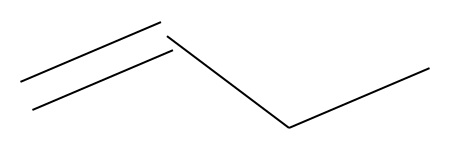

In [50]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

Chem.MolFromSmiles('C=CCC')

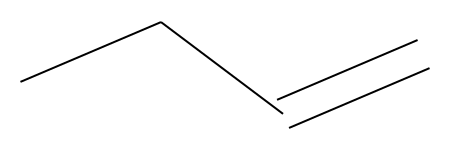

In [51]:
Chem.MolFromSmiles('CCC=C')

In [52]:
canonical_smiles(['CCC=C'])

['C=CCC']

In [53]:
# Canonical SMILES
Canon_SMILES = canonical_smiles(train_dataset.SMILES)
len(Canon_SMILES)

[16:24:19] Conflicting single bond directions around double bond at index 7.
[16:24:19]   BondStereo set to STEREONONE and single bond directions set to NONE.
[16:24:19] Conflicting single bond directions around double bond at index 16.
[16:24:19]   BondStereo set to STEREONONE and single bond directions set to NONE.
[16:24:19] Conflicting single bond directions around double bond at index 33.
[16:24:19]   BondStereo set to STEREONONE and single bond directions set to NONE.
[16:24:19] Conflicting single bond directions around double bond at index 18.
[16:24:19]   BondStereo set to STEREONONE and single bond directions set to NONE.
[16:24:19] Conflicting single bond directions around double bond at index 27.
[16:24:19]   BondStereo set to STEREONONE and single bond directions set to NONE.
[16:24:19] Conflicting single bond directions around double bond at index 9.
[16:24:19]   BondStereo set to STEREONONE and single bond directions set to NONE.
[16:24:19] Conflicting single bond directi

1528

In [54]:
# Put the smiles in the dataframe
train_dataset['SMILES'] = Canon_SMILES
train_dataset

,Code,SMILES,Bioactivity
0,415897,CC(=O)Nc1ccc(CN2CCC=C(CCC(=O)NO)C2=O)cc1,inactive
1,1589183,COc1cc(/C=C/C(=O)Nc2ccccc2N)ccc1OCC(=O)Nc1ccc(...,inactive
2,1161066,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)OC(C)(C...,active
3,2100074,CC(Nc1ncnc2[nH]c(-c3ccc(CN4CCN(CCOCCCCC(=O)NO)...,inactive
4,386804,Cc1ccc(C(=O)CSC(=S)SC(C)C)cc1,inactive
...,...,...,...
1523,579918,O=C(/C=C/c1cccc(/C=C/C(=O)c2ccccc2)c1)NO,active
1524,2231456,COc1cc(OC)c2c(=O)[nH]c(-c3ccc(OCCCCCC(=O)NO)cc...,inactive
1525,440542,COc1ccc(NS(=O)(=O)c2cccc(/C=C/C(=O)NO)c2)cc1OC,active
1526,476598,NS(=O)(=O)NCCCCC(NC(=O)OCc1ccc(Cl)cc1)C(=O)Nc1...,inactive


In [55]:
# Create a list for duplicate smiles
duplicates_smiles = train_dataset[train_dataset['SMILES'].duplicated()]['SMILES'].values
len(duplicates_smiles)

0

In [56]:
# Create a list for duplicate smiles
train_dataset[train_dataset['SMILES'].isin(duplicates_smiles)].sort_values(by=['SMILES'])

,Code,SMILES,Bioactivity


In [57]:
dataset_new = train_dataset.drop_duplicates(subset=['SMILES'])
len(dataset_new)

1528

In [58]:
dataset_new

,Code,SMILES,Bioactivity
0,415897,CC(=O)Nc1ccc(CN2CCC=C(CCC(=O)NO)C2=O)cc1,inactive
1,1589183,COc1cc(/C=C/C(=O)Nc2ccccc2N)ccc1OCC(=O)Nc1ccc(...,inactive
2,1161066,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)OC(C)(C...,active
3,2100074,CC(Nc1ncnc2[nH]c(-c3ccc(CN4CCN(CCOCCCCC(=O)NO)...,inactive
4,386804,Cc1ccc(C(=O)CSC(=S)SC(C)C)cc1,inactive
...,...,...,...
1523,579918,O=C(/C=C/c1cccc(/C=C/C(=O)c2ccccc2)c1)NO,active
1524,2231456,COc1cc(OC)c2c(=O)[nH]c(-c3ccc(OCCCCCC(=O)NO)cc...,inactive
1525,440542,COc1ccc(NS(=O)(=O)c2cccc(/C=C/C(=O)NO)c2)cc1OC,active
1526,476598,NS(=O)(=O)NCCCCC(NC(=O)OCc1ccc(Cl)cc1)C(=O)Nc1...,inactive


In [59]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names

# Function call
Mol_descriptors,desc_names = RDkit_descriptors(dataset_new['SMILES'])

In [60]:
df_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.675012,-4.214057,13.675012,0.533677,0.544368,331.372,310.204,331.153206,128,0,...,0,0,0,0,0,0,0,0,0,0
1,14.081369,-3.966377,14.081369,0.368313,0.326448,469.900,448.732,469.120462,170,0,...,0,0,0,0,0,0,0,0,0,0
2,16.495359,-6.466535,16.495359,1.038711,0.204643,681.787,634.411,681.337378,266,0,...,0,0,0,0,0,0,0,0,0,0
3,12.391594,-4.993557,12.391594,0.021733,0.098493,571.726,530.398,571.327088,222,0,...,0,0,0,0,0,0,0,0,0,0
4,12.787298,-3.376683,12.787298,0.139228,0.603845,284.471,268.343,284.036328,92,0,...,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,12.897038,-1.665727,12.897038,0.498002,0.385123,293.322,278.202,293.105193,110,0,...,0,0,0,0,0,0,0,0,0,0
1524,13.507358,-4.503114,13.507358,0.253733,0.258120,427.457,402.257,427.174336,164,0,...,0,0,0,0,0,0,0,0,0,0
1525,13.575572,-5.789787,13.575572,0.600909,0.385848,378.406,360.262,378.088557,138,0,...,0,1,0,0,0,0,0,0,0,0
1526,14.265784,-6.059606,14.265784,0.111931,0.251959,552.078,525.870,551.106389,192,0,...,0,0,0,0,0,1,0,0,0,0


In [71]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=True)
    mols = [Chem.MolFromSmiles(smi) for smi in data]

    # pandas df
    df = calc.pandas(mols)
    return df

In [72]:
X_train = All_Mordred_descriptors(train_dataset['SMILES'])

In [73]:
X_train.shape

(1528, 1613)

In [62]:
X_train = All_Mordred_descriptors(train_dataset['SMILES'])
X_validation = All_Mordred_descriptors(validation_dataset['SMILES'])
X_test = All_Mordred_descriptors(test_dataset['SMILES'])

[16:25:31] Conflicting single bond directions around double bond at index 18.
[16:25:31]   BondStereo set to STEREONONE and single bond directions set to NONE.
[16:25:31] Conflicting single bond directions around double bond at index 27.
[16:25:31]   BondStereo set to STEREONONE and single bond directions set to NONE.
[16:25:31] Conflicting single bond directions around double bond at index 7.
[16:25:31]   BondStereo set to STEREONONE and single bond directions set to NONE.
[16:25:31] Conflicting single bond directions around double bond at index 12.
[16:25:31]   BondStereo set to STEREONONE and single bond directions set to NONE.
[16:25:31] Conflicting single bond directions around double bond at index 17.
[16:25:31]   BondStereo set to STEREONONE and single bond directions set to NONE.
[16:25:31] Conflicting single bond directions around double bond at index 26.
[16:25:31]   BondStereo set to STEREONONE and single bond directions set to NONE.
[16:25:31] Conflicting single bond direct

In [63]:
print(X_train.shape, X_validation.shape, X_test.shape)

(1528, 1826) (328, 1826) (327, 1826)


In [74]:
X_train_c = X_train.copy()
X_train_c

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,18.034348,14.320046,0,0,30.067045,2.352415,4.704831,30.067045,1.252794,4.073713,...,9.808682,57.837659,331.153206,7.358960,1563,33,116.0,130.0,8.777778,5.472222
1,25.174366,18.649482,0,0,42.136275,2.331537,4.663074,42.136275,1.276857,4.400152,...,10.188704,68.631094,469.120462,8.687416,4034,48,164.0,186.0,11.361111,7.416667
2,37.538686,29.431134,0,0,61.512326,2.480052,4.957584,61.512326,1.255354,4.800286,...,10.754813,100.620118,681.337378,7.097264,9496,79,252.0,293.0,18.840278,10.875000
3,32.583931,20.649670,0,2,55.606317,2.465857,4.801537,55.606317,1.32396,4.657161,...,10.461760,92.951443,571.327088,6.883459,8515,61,214.0,246.0,11.222222,9.444444
4,12.527324,11.057433,0,0,20.212485,2.265174,4.530349,20.212485,1.18897,3.70986,...,9.259607,48.585800,284.036328,8.607161,608,20,78.0,84.0,7.305556,3.861111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,16.441795,13.196657,0,0,28.666147,2.277006,4.554011,28.666147,1.303007,3.984865,...,9.584452,55.091095,293.105193,7.921762,1263,28,104.0,115.0,7.055556,5.111111
1524,23.391543,16.900101,0,0,40.162722,2.474923,4.949846,40.162722,1.295572,4.340209,...,10.239495,66.504185,427.174336,7.628113,3344,48,154.0,178.0,10.25,7.194444
1525,19.417060,16.013418,0,0,32.647928,2.401161,4.802322,32.647928,1.25569,4.155767,...,10.041291,60.584828,378.088557,8.592922,1846,39,128.0,146.0,9.979167,5.986111
1526,27.594103,21.030459,0,0,44.985842,2.35888,4.624659,44.985842,1.249607,4.48389,...,10.162268,85.414908,551.106389,8.888813,4809,46,178.0,197.0,12.201389,7.930556


In [75]:
X_train_df = pd.DataFrame(X_train_c)
X_train_df

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,18.034348,14.320046,0,0,30.067045,2.352415,4.704831,30.067045,1.252794,4.073713,...,9.808682,57.837659,331.153206,7.358960,1563,33,116.0,130.0,8.777778,5.472222
1,25.174366,18.649482,0,0,42.136275,2.331537,4.663074,42.136275,1.276857,4.400152,...,10.188704,68.631094,469.120462,8.687416,4034,48,164.0,186.0,11.361111,7.416667
2,37.538686,29.431134,0,0,61.512326,2.480052,4.957584,61.512326,1.255354,4.800286,...,10.754813,100.620118,681.337378,7.097264,9496,79,252.0,293.0,18.840278,10.875000
3,32.583931,20.649670,0,2,55.606317,2.465857,4.801537,55.606317,1.32396,4.657161,...,10.461760,92.951443,571.327088,6.883459,8515,61,214.0,246.0,11.222222,9.444444
4,12.527324,11.057433,0,0,20.212485,2.265174,4.530349,20.212485,1.18897,3.70986,...,9.259607,48.585800,284.036328,8.607161,608,20,78.0,84.0,7.305556,3.861111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,16.441795,13.196657,0,0,28.666147,2.277006,4.554011,28.666147,1.303007,3.984865,...,9.584452,55.091095,293.105193,7.921762,1263,28,104.0,115.0,7.055556,5.111111
1524,23.391543,16.900101,0,0,40.162722,2.474923,4.949846,40.162722,1.295572,4.340209,...,10.239495,66.504185,427.174336,7.628113,3344,48,154.0,178.0,10.25,7.194444
1525,19.417060,16.013418,0,0,32.647928,2.401161,4.802322,32.647928,1.25569,4.155767,...,10.041291,60.584828,378.088557,8.592922,1846,39,128.0,146.0,9.979167,5.986111
1526,27.594103,21.030459,0,0,44.985842,2.35888,4.624659,44.985842,1.249607,4.48389,...,10.162268,85.414908,551.106389,8.888813,4809,46,178.0,197.0,12.201389,7.930556


In [76]:
X_train_df.to_excel('/home/mylab-pharma/Code/tuele/pan_HDAC/mylab_panHDAC-master/src/training_models/result_check/X_train_df_1613.xlsx')

In [68]:
nan_indices = X_train_df[X_train_df.isnull().any(axis=1)].index
print(nan_indices)

Index([], dtype='int64')


In [43]:
# encoding the label
import sklearn.preprocessing as preprocessing
y_train = np.array(train_dataset['Bioactivity'])
y_validation = np.array(validation_dataset['Bioactivity'])
y_test = np.array(test_dataset['Bioactivity'])

#Original data
print("Original data:")
print(y_train[0:5])
print(y_test[0:5])
print(y_validation[0:5])

#label encoding
label_encoder = preprocessing.LabelEncoder()
y_train  = label_encoder.fit_transform(y_train)
y_validation = label_encoder.fit_transform(y_validation)
y_test = label_encoder.fit_transform(y_test)
#Class encoded
print("Class encoded:")
print(list(label_encoder.classes_))
print(label_encoder.transform(label_encoder.classes_))
print("Encoded data:")
print(y_train[0:5])
print(y_test[0:5])
print(y_validation[0:5])

Original data:
['inactive' 'inactive' 'active' 'inactive' 'inactive']
['active' 'active' 'active' 'inactive' 'active']
['active' 'active' 'inactive' 'inactive' 'inactive']
Class encoded:
['active', 'inactive']
[0 1]
Encoded data:
[1 1 0 1 1]
[0 0 0 1 0]
[0 0 1 1 1]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

#converting to tensor 
X_train_df = pd.DataFrame(X_train)
X_validation_df = pd.DataFrame(X_validation)
X_test_df = pd.DataFrame(X_test)

X_train = torch.tensor(X_train_df.values.astype(np.float32))
X_validation = torch.tensor(X_validation_df.values.astype(np.float32))
X_test = torch.tensor(X_test_df.values.astype(np.float32))

y_train_df = pd.DataFrame(y_train)
y_validation_df = pd.DataFrame(y_validation)
y_test_df = pd.DataFrame(y_test)

y_train = torch.tensor(y_train_df.values.astype(np.float32))
y_validation = torch.tensor(y_validation_df.values.astype(np.float32))
y_test = torch.tensor(y_test_df.values.astype(np.float32))

In [ ]:
len(X_train[0])

1826

In [ ]:
# model
class ann_try(nn.Module):
    def __init__(self, input_dim=1826,layer1=512,layer2=256,drp=.2,output=1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim,layer1),
            nn.ReLU(),
            nn.Dropout(drp),
            nn.Linear(layer1,layer2),
            nn.ReLU(),
            nn.Dropout(drp),
            nn.Linear(layer2,output),
            nn.Sigmoid(),
        )
    def forward(self,input):
        return self.net(input)

In [ ]:
# trainning
def training(x_train = X_train,y_train=y_train,x_validation = X_validation,
            #  y_validation = y_validation,lr=0.001,l2=0.001,batch_size=64,epochs=100):
            y_validation = y_validation,lr=0.007206041689487159,l2=0.004176049826978714,batch_size=128,epochs=500):
    torch.manual_seed(0)
    losses=[]
    
    data_train = x_train
    labels_train = y_train
    #double train dataset
    # data_train   = torch.cat((x_train,x_train),axis=0)
    # labels_train = torch.cat((y_train,y_train),axis=0)
    
    train_ds = TensorDataset(data_train, labels_train)
    train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    model = ann_try()
    loss_func = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=lr,weight_decay=l2)
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            pred = model(xb)
            # pred = torch.sigmoid(model(xb))
            loss = loss_func(pred, yb)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        if epoch==0 or  epoch % 2 == 0:
            print(loss)
        losses.append(loss)
    losses_tensor = torch.tensor(losses)
    plt.title("Loss in training")
    plt.xlabel('Numepoch')
    plt.ylabel('Loss_value')
    plt.plot(losses_tensor.detach())
    
    model.eval()
    y_pred_train = model(x_train)>.5
    acc_train = 100*torch.mean((y_pred_train == y_train).float())
    y_pred = model(x_validation)>.5
    acc_val = 100*torch.mean((y_pred == y_validation).float())

    # mse = mean_squared_error(model(x_validation).detach().numpy(),y_.detach().numpy())
    print('Accuracy on validation set:' ,acc_train)
    print('Accuracy on validation set:' ,acc_val)

    return acc_train, acc_val, len(train_dl) #to specify what to maximize in this function

In [ ]:
training(X_train,y_train,X_validation,y_validation)

RuntimeError: all elements of input should be between 0 and 1